In [75]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

c:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  


array([], dtype=float64)

# Описательная статистика. Продолжение.

Загрузим новый датасет, для предсказания болезни человека (сердечная болезнь). 


**Колонки:**
> 1. **age**
> 2. **sex** 
> 3. **cp** chest pain type (4 values) 
> 4. **trestbps** resting blood pressure 
> 5. **chol** serum cholestoral in mg/dl 
> 6. **fbs** fasting blood sugar > 120 mg/dl
> 7. **restecg** resting electrocardiographic results (values 0,1,2)
> 8. **thalach** maximum heart rate achieved 
> 9. **exang** exercise induced angina 
> 10. **oldpeak** = ST depression induced by exercise relative to rest.
A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
> 11. the **slope** of the peak exercise ST segment 
> 12. **ca** number of major vessels (0-3) colored by flourosopy 
> 13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. **target** - ill or not


In [76]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(data)

303

In [15]:
age = data.age
thalach = data.thalach

In [ ]:
sns.pairplot(data)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(thalach.to_numpy().reshape(-1,1), age)

In [20]:
print(model.coef_)
print(model.intercept_)

[-0.15801751]
78.01316132999852


In [ ]:
age.to_numpy().reshape(-1,1)

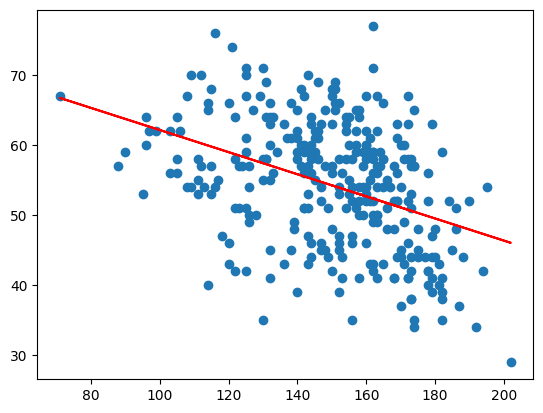

In [25]:
plt.scatter(thalach, age)
plt.plot(thalach, model.predict(thalach.to_numpy().reshape(-1,1)), c='red')

In [ ]:
sns.heatmap(round(data.corr(), 2), cmap='RdYlGn', annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [27]:
model.predict(np.array([40, 70, 90, 140]).reshape(-1,1))

array([71.69246099, 66.95193574, 63.79158557, 55.89071016])

# Линейная регрессия

Посмотрим какие данные линейно зависимы:

In [ ]:
sns.jointplot(data, x='age', y='thalach', hue='target')

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Есть две переменные, имеющие максимальную линейную зависимость - age (возраст) и thalach ( максимальный показатель биения сердца). Построим линейную регрессию для них.

In [30]:
from sklearn.linear_model import LinearRegression
age = data['age']
thalach = data['thalach']
model = LinearRegression()
result = model.fit(np.array(thalach).reshape(-1,1), age)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 78.01316132999852
slope: [-0.15801751]


In [ ]:
res = result.predict(thalach)

In [34]:
from sklearn.metrics import mean_squared_error
res = result.predict(thalach.to_numpy().reshape(-1,1))
mean_squared_error(age, res, squared=False)

8.3159720603862

In [ ]:
res

Intercept - коэффициент b в уравнении прямой y=kx+b

slope - коэффициент k в уравнении прямой y=kx+b

<AxesSubplot:xlabel='thalach', ylabel='age'>

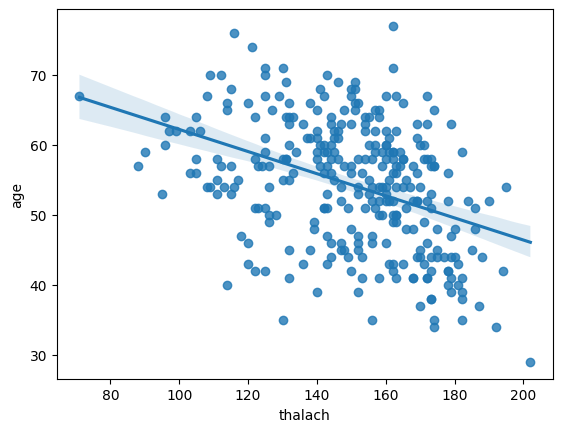

In [29]:
sns.regplot(data, x='thalach', y='age')

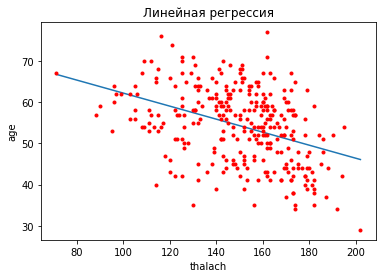

In [7]:
plt.xlabel('thalach')
plt.ylabel('age')
plt.title('Линейная регрессия')
x = np.linspace(min(thalach), max(thalach), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(thalach, age, 'r.')
plt.show()

In [13]:
model.predict(np.array([71]).reshape(-1, 1))

array([66.79391823])

Посмотрим на коэффициент Пирсона. Он отличается от коэфициентов линейной регрессии

In [10]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(thalach, age)
print(corr)

-0.3985219381210674


Построим линейную регрессию с помощью sns.regplot. Графики получаются идентичны

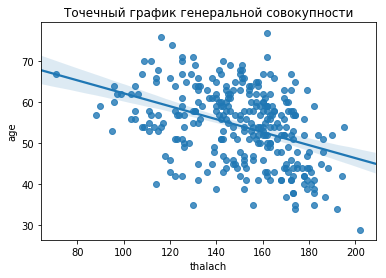

In [9]:
sns.regplot(x= thalach, y=data['age'],data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('age')
plt.title('Точечный график генеральной совокупности')
plt.show()

# Многомерная линейная регрессия

Допустим, стоит задача предсказать показатель уровня холестирина в зависимости от возраста trestbps и thalach. 

In [40]:
cp = data.cp.to_numpy().reshape(-1,1)
exang = data.exang.to_numpy().reshape(-1,1)
target = data.target.to_numpy().reshape(-1,1)
x = np.hstack((cp, exang))


In [43]:
model = LinearRegression().fit(x, target)

In [44]:
print(model.intercept_)
print(model.coef_)

[0.50893689]
[[ 0.14971323 -0.33407934]]


In [52]:
model.predict(np.array([2,0]).reshape(1,-1))

array([[0.80836336]])

In [14]:
trestbps = data['trestbps']
thalach = data['thalach']
chol = data['chol']
x = np.vstack([np.array(trestbps), np.array(thalach)]).T
print('x - это двумерная матрица, где колонки - это trestbps и thalach : ')
print(x[:3])
y = np.array(chol)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это trestbps и thalach : 
[[145 150]
 [130 187]
 [130 172]]


Посмотрим на коэффициенты линейной регрессии

In [15]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 199.84798696374438
slope: [ 0.36343946 -0.00949723]


Можно заметить, что переменная chol сильнее зависит от trestbps (0.36) и слабо зависит от thalach (-0.009)

In [16]:
cp = data['cp']
exang = data['exang']
target = data['target']
x = np.vstack([np.array(cp), np.array(exang)]).T
print('x - это двумерная матрица, где колонки - это cp и exang : ')
print(x[:3])
y = np.array(target)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

x - это двумерная матрица, где колонки - это cp и exang : 
[[3 0]
 [2 0]
 [1 0]]
intercept: 0.5089368888781962
slope: [ 0.14971323 -0.33407934]


Теперь зная показатели кого-либо cp (тип боли в груди) и exang (показатель стенокардии), мы можем предсказать болен человек или здоров с помощью метода predict()

In [17]:
print('Предсказание модели: ', model.predict(x[0:2]))

Предсказание модели:  [0.95807659 0.80836336]


**Вариационный ряд:**

In [18]:
len(data)

303

In [19]:
age = data['age']
age.head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

**Квантиль** - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем 

![alt text](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/quantile.jpg)

Расположение квантилей Q1 и Q2 в выборке

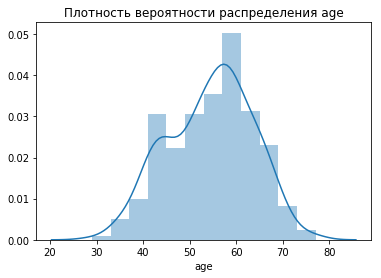

In [20]:
sns.distplot(age)
plt.title('Плотность вероятности распределения age')
plt.show()

In [58]:
age.quantile(0.5)

55.0

In [60]:
data.quantile(0.3)

age          50.0
sex           0.0
cp            0.0
trestbps    120.0
chol        217.6
fbs           0.0
restecg       0.0
thalach     140.6
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.3, dtype: float64

In [62]:
print("age : ", len(age))  
print("Q2 квантиль ряда : ", np.quantile(age, [.50, 0.7, 0.9])) 


age :  303
Q2 квантиль ряда :  [55. 59. 66.]


Квантиль серединный для всех колонок таблицы

In [64]:
data.quantile([0.1, 0.4, 0.7, 0.9])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.1,42.0,0.0,0.0,110.0,188.0,0.0,0.0,116.0,0.0,0.00,1.0,0.0,2.0,0.0
0.4,53.0,1.0,0.0,126.0,230.0,0.0,0.0,146.0,0.0,0.38,1.0,0.0,2.0,0.0
0.7,59.0,1.0,2.0,140.0,268.0,0.0,1.0,163.0,1.0,1.40,2.0,1.0,3.0,1.0
0.9,66.0,1.0,2.0,152.0,308.8,1.0,1.0,176.6,1.0,2.80,2.0,2.0,3.0,1.0


Квантили

In [23]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.10,42.0,0.0,0.0,110.0,188.0,0.0,0.0,116.0,0.0,0.0,1.0,0.0,2.0,0.0
0.25,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
0.50,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
0.75,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0


**Квантили специальных видов - квартиль**

In [24]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Квартили описывают рассеянность данных относительно середины выборки. 
**Интеркварти́льным размахом** (англ. Interquartile range) называется разность между третьим и первым квартилями, то есть x_0,75-x_0,25. Интерквартильный размах является характеристикой разброса распределения величины и является робастным аналогом дисперсии. Вместе, медиана и интерквартильный размах могут быть использованы вместо математического ожидания и дисперсии в случае распределений с большими выбросами, либо при невозможности вычисления последних.

Посмотрим, как отличаются вероятностные распределения мужчин и женщин по параметру: **thalach** - максимальное значение heart rate

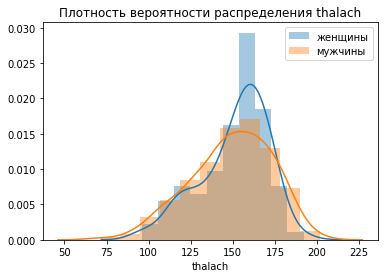

In [27]:
f_thalach = data[data['sex']==0]['thalach']
m_thalach = data[data['sex']==1]['thalach']
sns.distplot(f_thalach)
sns.distplot(m_thalach)
plt.title('Плотность вероятности распределения thalach')
plt.legend(['женщины', 'мужчины'])
plt.show()

Медиана двух выборок практически равна и особо не дает информацию о них.

In [28]:
f_thalach.mean()

151.125

In [29]:
m_thalach.mean()

148.96135265700482

А вот квантили отличаются и дают больше информации о выборках и их различиях.

In [30]:
print('Квантили по женщинам')
f_thalach.quantile([.1, .25, .5, .75]) 

Квантили по женщинам


0.10    121.50
0.25    141.25
0.50    157.00
0.75    165.00
Name: thalach, dtype: float64

In [31]:
print('Квантили по мужчинам')
m_thalach.quantile([.1, .25, .5, .75]) 

Квантили по мужчинам


0.10    113.6
0.25    132.0
0.50    151.0
0.75    168.0
Name: thalach, dtype: float64

Можно заметить, что у второй выборке (по мужчинам) рассеяние больше, чем у первой.

# Проверка статистических гипотез

Генеральная совокупность - совокупность всех объектов (единиц), относительно которых учёный намерен делать выводы при изучении конкретной проблемы. 

Выборка - множество случаев (испытуемых, объектов, событий, образцов), с помощью определённой процедуры выбранных из генеральной совокупности для участия в исследовании.

303

**Генеральная совокупность** в данном случае - все пациенты. Их количество - 303.

Возьмем две колонки из генеральной совокупности:

**trestbps** - давление в спокойном состоянии

**chol** - уровень холестирина

Построим точечный график этих параметров.

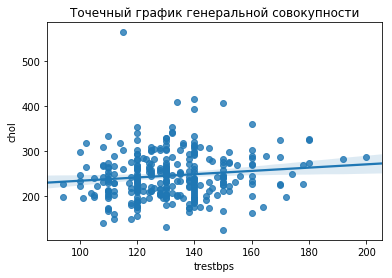

In [33]:
trestbps = data['trestbps']
chol = data['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Точечный график генеральной совокупности')
plt.show()

Возьмем некую выборку из генеральной совокупности, например, людей, возраст которых меньше 45 лет, и построим точечный график для данной выборки.

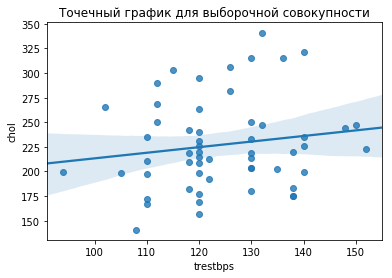

In [34]:
trestbps_small = data[data['age']<45]['trestbps']
chol_small = data[data['age']<45]['chol']
sns.regplot(x= trestbps_small, y=chol_small,data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Точечный график для выборочной совокупности')
plt.show()

По графику можно заметить, что если мы будем рассматривать выборку людей меньше 45 лет, то статистические формулы о генеральной совокупности будут неверны, так как выборка не презентативна.

Проблема в том, как выбрать выборку из генеральной совокупности таким образом, что эта анализ этой выборки позволит сделать выводы о генеральной совокупности. Существует необходимость в сборе первичной информации.

# Нулевая гипотеза

Допустим, у нас есть выборка из нескольких элементов и мы хотим понять, насколько она схожа с генеральной совокупностью. Мы выдвигаем **нулевую гипотезу** о том, что trestbps не связана с chol и проверяем, насколько гипотеза верна для генеральной совокупности. Если гипотеза неверна, мы отвергаем её, и это значит, что связь между переменными есть.

Возьмем выборку людей, возраст которых меньше 40 лет. Посмотрим точечный график двух параметров: **thalach** - максимальный пульс и **trestbps** - показатель давления в спокойном положении. По графику можно сделать вывод, что эти параметры имеют линейную зависимость.

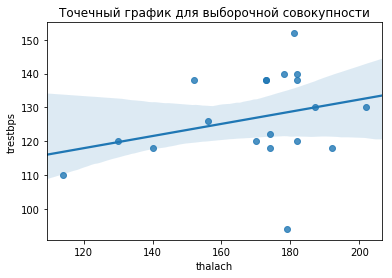

In [ ]:
thalach_small = data[data['age']<=40]['thalach']
trestbps_small = data[data['age']<=40]['trestbps']
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.title('Точечный график для выборочной совокупности')
plt.show()

В генеральной совокупности можно увидеть, что этой зависимости нет.

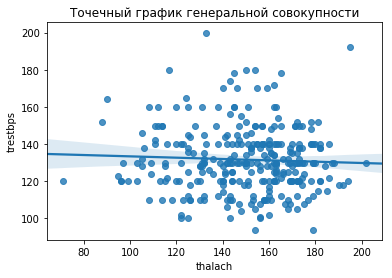

In [35]:
thalach = data['thalach']
trestbps = data['trestbps']
sns.regplot(x= thalach, y=trestbps,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.title('Точечный график генеральной совокупности')
plt.show()

# **AB - тестирование**

# Проверка гипотезы t-критерия Стьюдента

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза о том, что выборочные средние значения равны:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная о том, что выборочные средние не равны:

$$
H_1: \mu_x \ne \mu_y.
$$

 Тест измеряет насколько среднеквадратичное значение меняется среди выборок. Если мы получаем высокое p-value, например, выше 0.05 или 0.1, тогда мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. Если p-value меньше, чем 1% (или 5%), то мы отвергаем нулевую гипотезу.

# P-value или статистическая значимость

P-значение, или значение вероятности, это статистическая величина, выраженная числом от 0 до 1, которая используется для проверки гипотезы. В клинических испытаниях данная величина применяется для определения, является ли полученный в клинических испытаниях результат случайным.

До начала сбора данных необходимо определить уровень значимости, который обычно равен 5 % (или 0,05), хотя в зависимости от исследования может быть выбран и другой показатель.

**Статистически значимым** (и позволяющим отвергнуть нулевую гипотезу)при этом считается результат, р-значение которого равно уровню значимости или меньше его. Это, как правило, обозначается следующим образом: p ≤ 0,05.

При подсчете p-значения вначале предполагается, что на самом деле значительной разницы между двумя исследуемыми режимами лечения, т.е. новым и стандартным лечением, не существует (нулевая гипотеза). Затем определяется возможность (вероятность) случайности наблюдаемого различия при условии верности нашего предположения (т.е. при условии отсутствия объективных различий). Это и есть p-значение.

Таким образом, **p-значение — это вероятность получить результаты, схожие по значимости с наблюдаемыми в исследовании**, при реальном отсутствии различий между вариантами лечения. При небольшом p-значении маловероятна случайность результатов, что дает основание отвергнуть предположение об отсутствии различий между двумя режимами лечения (отвергнуть нулевую гипотезу). При большом p-значении наблюдаемая разница может быть результатом случайности, и предположение об отсутствии различий между двумя режимами лечения не может быть отвергнуто.

# Одновыборочный t-критерий

T-test используют для определения, насколько среднее исследуемой даты статистически отличается от среднего значения генеральной совокупности. Вычисляется по формуле.

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

Где ${\overline X}$ - выборочное среднее, m - среднее совокупности, ${S_{X}}$ - выборочная дисперсия.

Возьмем выборку женщин по параметру "trestbps" или уровень давления в состоянии спокойствия.

In [65]:
female_bps = data['trestbps'].iloc[5:]
stats.ttest_1samp(female_bps, data['trestbps'].mean())

Ttest_1sampResult(statistic=0.04307683284689445, pvalue=0.9656692326768086)

*T*-значение 0.71, и в одновыборочном критерии мы оцениваем p-value.

p-value равно 0.46, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и генеральной совокупности в целом. 

Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так.

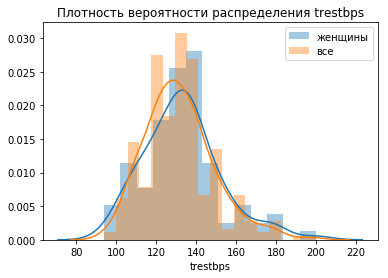

In [38]:
f_trestbps = data[data['sex']==0]['trestbps']
trestbps = data['trestbps']
sns.distplot(f_trestbps)
sns.distplot(trestbps)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'все'])
plt.show()

In [39]:
print('Количество женщин всего: ', len(f_trestbps))

Количество женщин всего:  96


# Двухвыборочный t-критерий для независимых выборок

t-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся.

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

Сравним давление женщин и мужчин. 

In [41]:
female_bps = data[data['sex']==0]['trestbps']

male_bps = data[data['sex']==1]['trestbps']

stats.ttest_ind(female_bps, male_bps)

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)

T-значение 0.98, p-value равно 0.32, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и мужчин в целом.

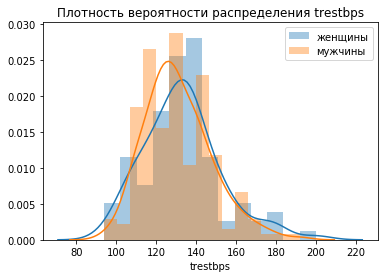

In [42]:
sns.distplot(female_bps)
sns.distplot(male_bps)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'мужчины'])
plt.show()

Сравним показатели давления больных и здоровых людей

In [43]:
healthy_bps = data[data['target']==0]['trestbps']

ill_bps = data[data['target']==1]['trestbps']

stats.ttest_ind(healthy_bps, ill_bps)

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

t-value равно 2,5 и p-value меньше 0.05, значит, группы статистически отличаются (понятно почему - у сердечников другие показатели давления)

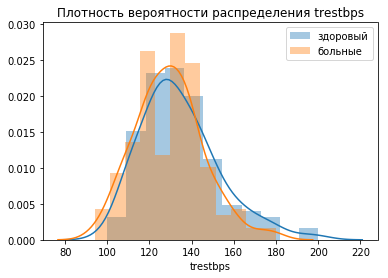

In [44]:
sns.distplot(healthy_bps)
sns.distplot(ill_bps)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['здоровый', 'больные'])
plt.show()

Сравним две группы людей (больных и здоровых) по показателям oldpeak (тест, который указывает на высокую вероятность заболевания коронарной артерии, - это тест, в котором наблюдается значительная депрессия ST при низкой частоте работы, связанная с типичной стенообразной болью и снижением артериального давления). Так как здоровые показатели очевидно отличаются от больных, посмотрим  статистические показатели.

In [45]:
healthy_oldpeak = data[data['target']==0]['oldpeak']

ill_oldpeak = data[data['target']==1]['oldpeak']

stats.ttest_ind(healthy_oldpeak, ill_oldpeak)


Ttest_indResult(statistic=8.279579663866224, pvalue=4.085346391354538e-15)

Высокий показатель t-value=8.2 и низкий показатель p-value=0 говорит о том, что группы статистически значимы.

# Парный t-тест

Как пример AB-тестирования. Если в предыдущих примерах выборки не зависели между собой, то в парном t-тесте выборка одна и та же, но разные условия тестирования. Вычисляется по формуле $$t=\frac{\overline{d}}{\frac{s}{\sqrt{n}}}$$ где ${\overline{d}}$ - среднее отличие между элементами.

Допустим, есть показатели того, как долго спят пациенты до приема таблеток и после приема таблеток. Нужно оценить похожесть выборок. 

In [73]:
import statistics
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [1.3, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]
d_c = np.var(control)
d_t = np.var(treatment)
print(d_c, d_t)
df_c = len(control)
df_t = len(treatment)
t_ = stats.t.cdf(d_t / d_c, df_t-1, df_c-1)
1 - t_

1.3075999999999997 6.850900000000001


0.9977599366887341

t-значение -3.624, p-value 0.0055, что меньше чем 0.05 or 0.01, поэтому мы отвергаем нулевую гипотезу и мы можем сказать, что есть статистически значимая разница между тем, как спят пациенты до приема таблеток и после. 

# Множественный тест (ANOVA)

Если мы хотим оценить не две группы, а три и более, нужно использовать множественное тестирование. 

Возьмем таблицу 3 группы из колонки restecg (resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)). Сравним их на наличие болезней

In [77]:
s1 = data[data['restecg'] == 0]['target']
s2 = data[data['restecg'] == 1]['target']
s3 = data[data['restecg'] == 2]['target']

In [78]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=5.131680093569876, pvalue=0.0064359766834508085)

In [47]:
restecg_0 = data[data['restecg']==0]['target']

restecg_1 = data[data['restecg']==1]['target']

restecg_2 = data[data['restecg']==2]['target']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=5.131680093569876, pvalue=0.0064359766834508085)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным типом показателей ЭКГ.

# Критерий Манна-Уитни

Если данные не распределены нормально, нужен критерий Манна-Уитни, также известный как Критерий Уилкоксона.  Данные представляют финансовые результаты двух разных интернет-магазинов схожей тематики.

In [ ]:
a = [742,148,423,424,122,432,-1,232,243,332,213]
b = [-1,3,4,2,1,3,2,4,1,2]

In [80]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=100.5, pvalue=0.001487724443982115)

In [79]:
a = [742,148,423,424,122,432,-1,232,243,332,213]
b = [-1,3,4,2,1,3,2,4,1,2]
print (stats.ttest_ind(a,b))

Ttest_indResult(statistic=4.683215290130369, pvalue=0.00016194333739811412)


In [49]:
u, p_value = stats.mannwhitneyu(a, b)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0007438622219910575


Критерий Манна-Уитни дает больше информации о различии выборок. 

# Критерий Фишера

Допустим, мы посчитали количество китов и акул в Атлантическом и Индийском океанах. В Атлантическом мы нашли 8 китов и 1 акулу, в Индийском океане 2 кита и 5 акул. Таблица выглядит как:

|  | Атлантический | Индийский |
| --- | --- | --- |
| киты | 8 | 2 |
| акулы | 1 | 5 |


Мы используем эту таблицу чтобы найти p-value

In [50]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])
pvalue

0.03496503496503495

P-value примерно равно 3.5%. Обычно пороговый уровень значимости примерно 5% - если мы используем данный порог, то можно сделать вывод, что рассматриваемая выборка имеет **статистическую значимость** (группы различны): киты предпочитают Атлантический океан, а акулы предпочитают Индийский океан

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев